# Obtención del modelo de un panel fotovoltáico

Como aplicación del método de búsqueda de **Enfriamiento Simulado**, se obtendrán los parámetros de un panel fotovoltáico basado en el modelo de un solo diodo, este es:
$$
I_L=I_{ph}-I_{SD}\left(e^{\frac{V_L+I_LR_S}{nV_T}}-1\right)-\frac{V_L+I_LR_S}{R_{sh}},
$$
donde los parámetros a obtener son $R_S$, $R_{sh}$, $I_{ph}$, $I_{SD}$ y $n$; conociendo los valores de voltaje $V_L$ y corriente $I_L$ de forma experimental.

En condiciones de temperatura ambiente y constante, $V_T\approx 26\,\mathrm{mV}$.

Estos parámetros se buscan en el orden de:
* $R_S\rightarrow 10^{-2}$
* $R_{sh}\rightarrow 10$
* $I_{ph}\rightarrow 10^{-1}$
* $I_{SD}\rightarrow 10^{-6}$
* $n\rightarrow 1$

Encuentre los mejores parámetros para los datos en el archivo `panel.csv`.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
def enfriamiento_lin(E,generar_vecino,T0,DT,estado0):
  T=T0
  estado=estado0
  Energias=[]
  while T>0:
    Energias.append(E(estado))
    estado_new=generar_vecino(estado)
    if np.exp(-(E(estado_new)-E(estado))/T)>np.random.rand():
      estado=estado_new
    T-=DT
  return estado,Energias

def enfriamiento_geom(E,generar_vecino,T0,alpha,estado0):
  T=T0
  estado=estado0
  Energias=[]
  while T>0.0001:
    Energias.append(E(estado))
    estado_new=generar_vecino(estado)
    if np.exp(-(E(estado_new)-E(estado))/T)>np.random.rand():
      estado=estado_new
    T*=alpha
  return estado,Energias

In [ ]:
ruta='/content/drive/MyDrive/Colab Notebooks/ITESO/SimMat/SimMatO2025/Módulo 3 - Métodos de búsqueda/'
df_panel=pd.read_csv(ruta+'panel.csv',header=None)
df_panel

,0,1
0,0.2057,0.7640
1,0.1291,0.7620
2,0.0588,0.7605
3,0.0057,0.7605
4,0.0646,0.7600
5,0.1185,0.7590
6,0.1678,0.7570
7,0.2132,0.7570
8,0.2545,0.7555
9,0.2924,0.7540


In [ ]:
# Modelo del sistema
def panel(V_L,estado):
  R_S,R_sh,I_ph,I_SD,n=estado # En este ejemplo se buscan 5 parámetros
  V_T=0.0256
  I_L=np.random.rand()
  # Note que se usa un método numérico para encontrar el valor de la salida (I_L)
  for i in range(10):
    I_L_new=I_ph-I_SD*(np.exp((V_L+I_L*R_S)/(n*V_T))-1)-(V_L+I_L*R_S)/R_sh
    if np.linalg.norm(I_L_new-I_L)<0.00001:
      break
    I_L=I_L_new.copy()
  return I_L_new

In [ ]:
# Función de energía. Criterio de optimización
def E(estado):
  IL=panel(df_panel[0].values,estado) # En esta función se ejecuta el modelo
  return np.mean((IL-df_panel[1].values)**2) # Puede ser con signo positivo para minimizar o negativo para maximizar

In [ ]:
# Función para modificar los parámetros de búsqueda
# Es importante incorporar una función que limite el rango de búsqueda
def generar_vecino(estado):
  estado_new=estado.copy()
  estado_new += np.random.uniform(-0.01,0.01,5)*np.array([1e-2,10,1e-1,1e-6,1])
  estado_new[estado_new<0]=0 # estado_new = np.clip(estado_new,0,np.inf)
  return estado_new

In [ ]:
estado0=np.random.uniform(0.1,2,5)*np.array([1e-2,10,1e-1,1e-6,1])
generar_vecino(estado0),estado0 # Nos aseguramos de que el estado inicial y el vecino sean diferentes

(array([4.23019939e-03, 2.25910505e+00, 9.72219924e-02, 1.86395867e-06,
        1.13806967e+00]),
 array([4.28098186e-03, 2.15917411e+00, 9.69605304e-02, 1.87131745e-06,
        1.14010197e+00]))

In [ ]:
E(estado0)

np.float64(3.499970242897153)

np.float64(0.005459630708568221)

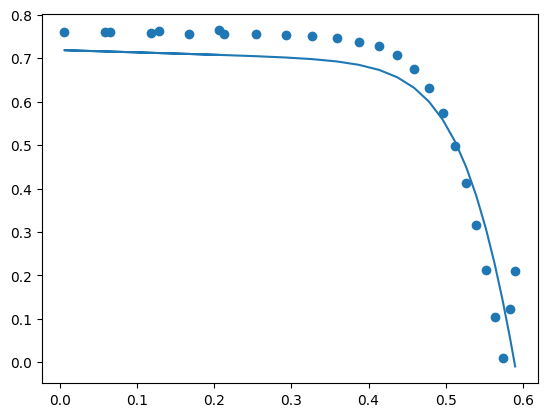

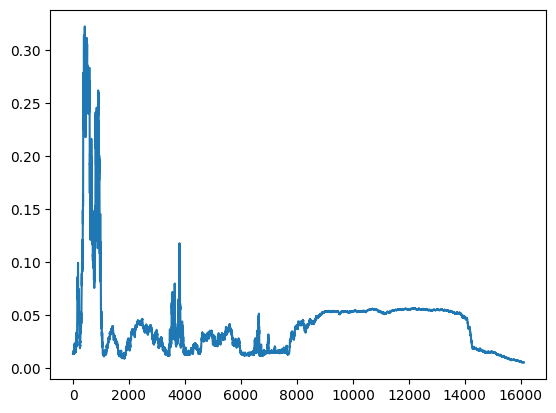

In [ ]:
#estado_opt,Energias=enfriamiento_geom(E,generar_vecino,1000,0.999,estado0)
estado_opt,Energias=enfriamiento_geom(E,generar_vecino,1000,0.999,estado_opt)
plt.scatter(df_panel[0],df_panel[1])
plt.plot(df_panel[0],panel(df_panel[0],estado_opt))
plt.figure()
plt.plot(Energias)
E(estado_opt)

In [ ]:
estado0,estado_opt

(array([4.28098186e-03, 2.15917411e+00, 9.69605304e-02, 1.87131745e-06,
        1.14010197e+00]),
 array([3.27107336e-02, 1.90123099e+01, 7.20073997e-01, 1.70643233e-06,
        1.78212102e+00]))